In [1]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandasql import sqldf

In [2]:
#read in IMDB top 250 dataset
#Information courtesy of IMDb (https://www.imdb.com). Used with permission.
df = pd.read_csv(r'IMDB_Top_250.csv')

In [3]:
#applying correct type to columns 
int_cols = ['startYear','runtimeMinutes','numVotes']
float_cols = ['averageRating']

#defining data type
df[int_cols] = df[int_cols].astype(int)
df[float_cols] = df[float_cols].astype(float)

In [4]:
#Describe dataset
print(df.columns)
print(df.info())
print(df.describe())
print(df.shape)

Index(['title', 'startYear', 'runtimeMinutes', 'genres', 'averageRating',
       'directors', 'numVotes'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           250 non-null    object 
 1   startYear       250 non-null    int32  
 2   runtimeMinutes  250 non-null    int32  
 3   genres          250 non-null    object 
 4   averageRating   250 non-null    float64
 5   directors       250 non-null    object 
 6   numVotes        250 non-null    int32  
dtypes: float64(1), int32(3), object(3)
memory usage: 10.9+ KB
None
         startYear  runtimeMinutes  averageRating      numVotes
count   250.000000      250.000000     250.000000  2.500000e+02
mean   1985.472000      129.696000       8.249600  6.462726e+05
std      23.946083       32.480757       0.294699  5.409986e+05
min    1921.000000       68.000000    

In [5]:
df.head()

,title,startYear,runtimeMinutes,genres,averageRating,directors,numVotes
0,The Shawshank Redemption,1994,142,Drama,9.3,Frank Darabont,2789245
1,The Godfather,1972,175,"Crime,Drama",9.2,Francis Ford Coppola,1942563
2,The Dark Knight,2008,152,"Action,Crime,Drama",9.0,Christopher Nolan,2769147
3,The Godfather Part II,1974,202,"Crime,Drama",9.0,Francis Ford Coppola,1319868
4,Pulp Fiction,1994,154,"Crime,Drama",8.9,Quentin Tarantino,2139799


In [6]:
#decade analysis
decade_input = """
SELECT TITLE, STARTYEAR,
(STARTYEAR/10) * 10 AS DECADE,
RUNTIMEMINUTES, GENRES, AVERAGERATING, DIRECTORS, NUMVOTES
from df
"""

imdb_output = sqldf(decade_input,locals())
imdb = pd.DataFrame(imdb_output)

imdb_output

,title,startYear,DECADE,runtimeMinutes,genres,averageRating,directors,numVotes
0,The Shawshank Redemption,1994,1990,142,Drama,9.3,Frank Darabont,2789245
1,The Godfather,1972,1970,175,"Crime,Drama",9.2,Francis Ford Coppola,1942563
2,The Dark Knight,2008,2000,152,"Action,Crime,Drama",9.0,Christopher Nolan,2769147
3,The Godfather Part II,1974,1970,202,"Crime,Drama",9.0,Francis Ford Coppola,1319868
4,Pulp Fiction,1994,1990,154,"Crime,Drama",8.9,Quentin Tarantino,2139799
...,...,...,...,...,...,...,...,...
245,Kaze no tani no Naushika,1984,1980,117,"Animation,Adventure,Sci-Fi",8.0,Hayao Miyazaki,176188
246,The Maltese Falcon,1941,1940,100,"Crime,Film-Noir,Mystery",8.0,John Huston,163470
247,Persona,1966,1960,85,"Drama,Thriller",8.1,Ingmar Bergman,125968
248,The Grapes of Wrath,1940,1940,129,Drama,8.1,John Ford,97263


In [7]:
#check gross, average 
gross_by_decade = """
SELECT DECADE, SUM(NUMVOTES) AS TOTAL_VOTES,
AVG(NUMVOTES) AS AVG_VOTES
FROM imdb
GROUP BY DECADE
ORDER BY DECADE
"""

agg_decade = sqldf(gross_by_decade,locals())
agg_decade

,DECADE,TOTAL_VOTES,AVG_VOTES
0,1920,632783,1.054638e+05
1,1930,1574612,2.249446e+05
2,1940,2796465,2.542241e+05
3,1950,5172703,2.463192e+05
4,1960,5762483,2.744040e+05
5,1970,13208529,6.289776e+05
6,1980,15335095,5.679665e+05
7,1990,41803205,1.019590e+06
8,2000,47899881,7.983313e+05
9,2010,27382397,7.823542e+05


In [8]:
agg_decade = pd.DataFrame(agg_decade)
agg_decade['DECADE']=agg_decade['DECADE'].astype(str)

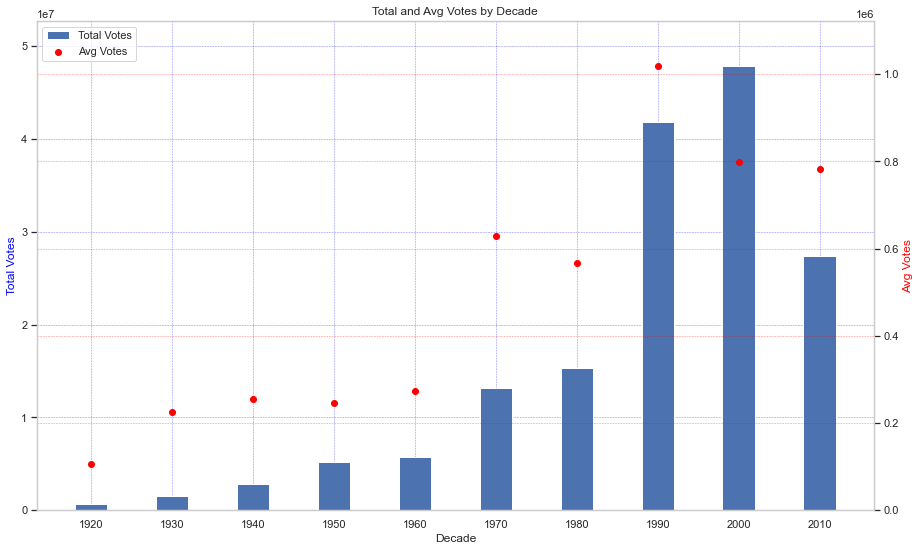

In [16]:
# Creating primary y-axis (gross_income)
fig, ax1 = plt.subplots(figsize=(15, 9))
ax1.bar(agg_decade['DECADE'], agg_decade['TOTAL_VOTES'], 
        width = 0.4, align='center', label='Total Votes')
ax1.set_xlabel('Decade')
ax1.set_ylabel('Total Votes', color='blue')

# Adjusting gridlines on the primary y-axis
ax1.grid(color='blue', linestyle='--', linewidth=0.5, alpha=0.5)

# Creating secondary y-axis (avg_income)
ax2 = ax1.twinx()
ax2.scatter(agg_decade['DECADE'], agg_decade['AVG_VOTES'], 
         marker='o', color='red', label='Avg Votes')
ax2.set_ylabel('Avg Votes', color='red')

# Adjusting gridlines on the secondary y-axis
ax2.grid(color='red', linestyle='--', linewidth=0.5, alpha=0.5)

# Setting the same y-axis limits for both ax1 and ax2
ax1.set_ylim(0, 1.1*max(agg_decade['TOTAL_VOTES']))
ax2.set_ylim(0, 1.1*max(agg_decade['AVG_VOTES']))

# Combining legends for both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Set title
plt.title('Total and Avg Votes by Decade')

# Show the plot
plt.show()

In [10]:
#check top 10 directors with most movies in IMDB 250
director_movies = """
SELECT DIRECTORS,
COUNT(TITLE) AS NUM_MOVIES,
SUM(NUMVOTES) AS TOTAL_VOTES,
AVG(NUMVOTES) AS AVG_VOTES,
ROUND(AVG(AVERAGERATING),2) AS AVG_RATING_PER_MOVIE
FROM imdb
GROUP BY DIRECTORS
ORDER BY TOTAL_VOTES DESC
LIMIT 10
"""

director_movies = sqldf(director_movies,locals())
director_movies

,directors,NUM_MOVIES,TOTAL_VOTES,AVG_VOTES,AVG_RATING_PER_MOVIE
0,Christopher Nolan,7,13174710,1.882101e+06,8.57
1,Quentin Tarantino,5,7497239,1.499448e+06,8.44
2,Martin Scorsese,7,7265703,1.037958e+06,8.30
3,Steven Spielberg,7,7088136,1.012591e+06,8.27
4,Peter Jackson,3,5573863,1.857954e+06,8.87
5,David Fincher,3,4974909,1.658303e+06,8.50
6,Stanley Kubrick,7,4272738,6.103911e+05,8.31
7,Frank Darabont,2,4144901,2.072450e+06,8.95
8,Francis Ford Coppola,3,3952283,1.317428e+06,8.87
9,Robert Zemeckis,2,3428359,1.714180e+06,8.65


In [11]:
agg_director = pd.DataFrame(director_movies)

C:\Users\jlenehan\AppData\Local\Temp\ipykernel_3240\3493706912.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(agg_director['directors'], rotation=-45, ha='left')


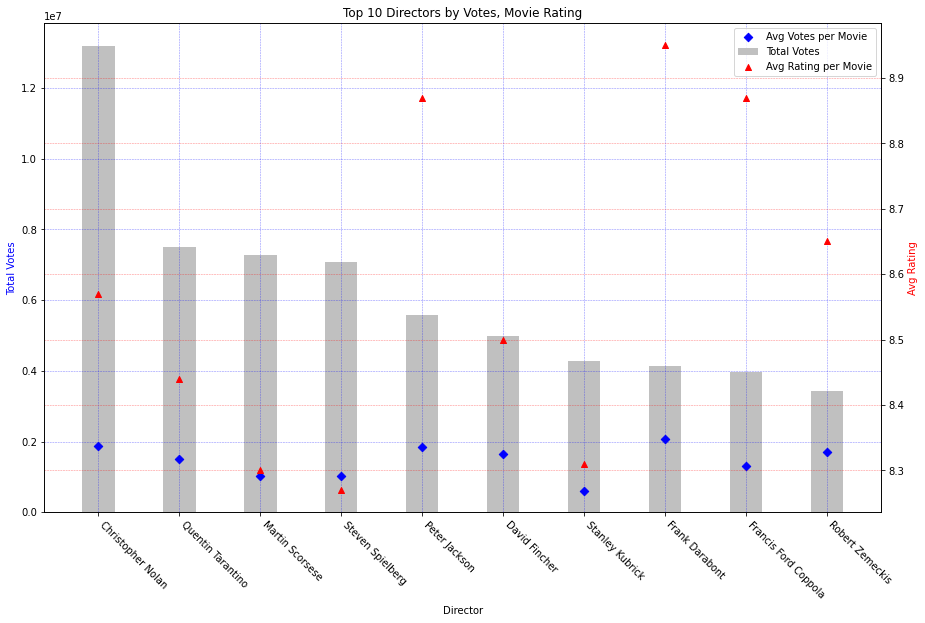

In [12]:
# Creating figure and axis
fig1, ax1 = plt.subplots(figsize=(15, 9))

#plotting bar chart of total box office
ax1.bar(agg_director['directors'], agg_director['TOTAL_VOTES'], 
        width=0.4, align='center', color='silver', label='Total Votes')
ax1.set_xlabel('Director')
ax1.set_xticklabels(agg_director['directors'], rotation=-45, ha='left')
ax1.set_ylabel('Total Votes', color='blue')

# Adjusting gridlines on the primary y-axis
ax1.grid(color='blue', linestyle='--', linewidth=0.5, alpha=0.5)

#creating scatter plot of avg box office
ax1.scatter(agg_director['directors'], agg_director['AVG_VOTES'], 
         marker="D", color='blue', label='Avg Votes per Movie')

# Creating scatter plot of avg rating on secondary axis
ax2 = ax1.twinx()
ax2.scatter(agg_director['directors'], agg_director['AVG_RATING_PER_MOVIE'], 
         marker='^', color='red', label='Avg Rating per Movie')
ax2.set_ylabel('Avg Rating', color='red')

# Adjusting gridlines on the secondary y-axis
ax2.grid(color='red', linestyle='--', linewidth=0.5, alpha=0.5)

# Combining legends for both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right')

# Set title
plt.title('Top 10 Directors by Votes, Movie Rating')

# Show the plot
plt.show()

In [13]:
#build in percentile case when statement

runtime_query = """
SELECT TITLE, NUMVOTES, RUNTIMEMINUTES,
CASE
WHEN RUNTIMEMINUTES < 106 THEN 'Quartile 1'
WHEN RUNTIMEMINUTES BETWEEN 106 AND 125 THEN 'Quartile 2'
WHEN RUNTIMEMINUTES BETWEEN 125 AND 146 THEN 'Quartile 3'
WHEN RUNTIMEMINUTES > 146 THEN 'Quartile 4'
END AS RUNTIME_QUARTILE
FROM imdb

ORDER BY NUMVOTES DESC
"""

runtime_output = sqldf(runtime_query,locals())
runtime_output

,title,numVotes,runtimeMinutes,averageRating,RUNTIME_QUARTILE
0,The Shawshank Redemption,2789245,142,9.3,Quartile 3
1,The Dark Knight,2769147,152,9.0,Quartile 4
2,Inception,2458558,148,8.8,Quartile 4
3,Fight Club,2223598,139,8.8,Quartile 3
4,Forrest Gump,2169627,142,8.8,Quartile 3
...,...,...,...,...,...
245,Andrei Rublev,55696,205,8.1,Quartile 4
246,Andaz Apna Apna,54472,160,8.0,Quartile 4
247,Sunrise: A Song of Two Humans,52743,94,8.1,Quartile 1
248,Le notti di Cabiria,50834,110,8.1,Quartile 2


In [14]:
runtime_output = pd.DataFrame(runtime_output)

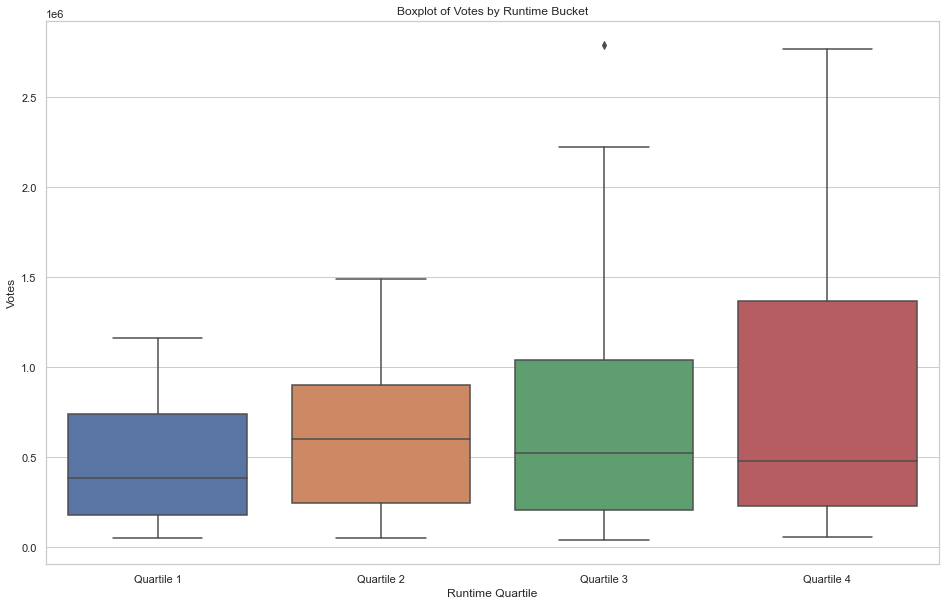

In [15]:
# Set the style for the plots
sns.set(style="whitegrid")

#Setting order of profit buckets
runtime_bucket_order = ['Quartile 1', 'Quartile 2', 
                        'Quartile 3', 'Quartile 4']

# Create the boxplot
plt.figure(figsize=(16, 10))
sns.boxplot(x='RUNTIME_QUARTILE', y='numVotes', 
            data=runtime_output, order = runtime_bucket_order, 
            showfliers=True)

# Add labels and title
plt.xlabel('Runtime Quartile')
plt.ylabel('Votes')
plt.title('Boxplot of Votes by Runtime Bucket')

# Show the plot
plt.show()